# Import Needed Libraries

In [ ]:
!pip install langdetect
!pip install sklearn
!pip install matplotlib
!pip install seaborn


     |████████████████████████████████| 981 kB 6.4 MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993242 sha256=7cb568690a17c1cab254c1e28b95b8c33263e132f343921aafdc503e77b17610
  Stored in directory: /root/.cache/pip/wheels/c5/96/8a/f90c59ed25d75e50a8c10a1b1c2d4c402e4dacfa87f3aff36a
Successfully built langdetect


In [ ]:
%pylab inline
%matplotlib inline

# Data Analysis lib imports
import pandas as pd
import numpy as np

# ML libs imports
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge ,RidgeCV , LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score ,KFold ,GridSearchCV
from sklearn.pipeline import make_pipeline , Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier , AdaBoostClassifier , GradientBoostingClassifier
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import re
from sklearn.preprocessing import StandardScaler, MinMaxScaler,PolynomialFeatures

# Visual libs imports
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import missingno as msno

# Language detection lib import
from langdetect import detect

from mlxtend.plotting import plot_confusion_matrix

Populating the interactive namespace from numpy and matplotlib


# Helper Functions 

In [ ]:
def lookup_dict(text, dictionary):
    for word in text.split():
        if word.lower() in dictionary:
            if word.lower() in text.split():
                text = text.replace(word, dictionary[word.lower()])
    return text

#num_features is a hyperparameter so we did this function to try to tune it
def makeFeatureVec(review, model, num_features):
    
    # Pre-initialising empty numpy array for speed
    featureVec = np.zeros((num_features,), dtype = "float32")
    
    # Unique word set
    #Converting Index2Word which is a list to a set for better speed in the execution.
    word_index = set(model.wv.index2word)
    
    # For division we need to count the number of words
    nword = 0
    
    # Iterate words in a review and if the word is in the unique wordset, add the vector values for each word.
    for word in review:
        if word in word_index:
            nword += 1
            featureVec = np.add(featureVec, model[word])
    
    # Divide the sum of vector values by total number of word in a review.
    featureVec = np.divide(featureVec, nword)        
    
    return featureVec

    
def getAvgFeatureVecs(reviews, model, num_features):
    counter = 0
    reviewFeatureVecs = np.zeros((len(reviews),num_features),dtype="float32")
    for review in reviews:
        # Printing a status message every 1000th review
        if counter%1000 == 0:
            print("Review %d of %d"%(counter,len(reviews)))
            
        reviewFeatureVecs[counter] = makeFeatureVec(review, model, num_features)
        counter = counter+1
        
    return reviewFeatureVecs

 
def plot_confu(conf_matrix):
  fig, ax = plot_confusion_matrix(conf_mat=conf_matrix, figsize=(6, 6), cmap=plt.cm.Blues)
  plt.xlabel('Predictions', fontsize=18)
  plt.ylabel('Actuals', fontsize=18)
  plt.title('Confusion Matrix', fontsize=18)
  plt.show()


def matrixesCalculation(y_true, y_pred):

  print('-------------------------------------')
  precision = metrics.precision_score(y_true, y_pred, average='binary')
  print('- Precision: %.3f' % precision)


  recall = metrics.recall_score(y_true, y_pred, average='binary')
  print('- Recall: %.3f' % recall)


  f1 = metrics.f1_score(y_true, y_pred, average='binary')
  print('- f1: %.3f' % f1)

 

  accuracy = metrics.accuracy_score(y_true, y_pred)
  print('- Accuracy: %.3f' % accuracy)
  print(" ")
  print(" ")
  print(" ")
  confusion_matrix = metrics.confusion_matrix(y_true, y_pred)
  plot_confu(confusion_matrix)

  print('-------------------------------------')

def gred_model(model , pram, X_train , y_train, X_val ,y_val):
  gridsearch = GridSearchCV(model, parameters)
  gridsearch.fit(X_train, y_train)
  matrixesCalculation(y_val,gridsearch.best_estimator_.predict(X_val))
  return gridsearch.best_params_ , gridsearch.best_estimator_


def experiment(model, X_train , y_train, X_val ,y_val):

  model.fit(X_train, y_train)
  print("fit done")
  matrixesCalculation(y_val,model.predict(X_val))
  return model

# EDA

### Reading file

In [ ]:
# df = pd.read_excel("All_Scribed_Data.xlsx")

df = pd.read_excel("just_en_udemy_data.xlsx")
df = df.drop("Unnamed: 0",axis = 1)
df = df[df['langue'] == "en"]

In [ ]:
df

,index,Catogory,Description,Oregnal_price,Hours,Instructor,Level,Num_lectures,Discount_price,Rating,Title,Views,isBestSaller,langue
0,0,0,Learn Python like a Professional Start from t...,139.99,22.0,Jose Portilla,0,155,21.99,4.6,2021 Complete Python Bootcamp From Zero to Her...,381969,0,en
1,1,0,COMPLETELY REDONE - The only course you need t...,99.99,63.5,Colt Steele,0,610,15.99,4.7,The Web Developer Bootcamp 2021,214468,0,en
2,2,0,"Master Angular 12 (formerly ""Angular 2"") and b...",89.99,34.0,Maximilian Schwarzmüller,0,461,12.99,4.6,Angular - The Complete Guide (2021 Edition),151943,1,en
3,3,0,Learn to create Machine Learning Algorithms in...,129.99,44.5,"Kirill Eremenko, Hadelin de Ponteves, SuperDat...",0,320,19.99,4.5,Machine Learning A-Z™: Hands-On Python & R In ...,150538,1,en
4,4,0,Become a full-stack web developer with just on...,109.99,55.0,Dr. Angela Yu,0,440,16.99,4.7,The Complete 2021 Web Development Bootcamp,149054,1,en
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13850,19046,11,"Topics: Descriptives, Correlation and Simple R...",89.99,2.5,Antonie van Voorden,1,30,12.99,3.9,Statistics explained easy 1 - Descriptives,77,0,en
13851,19048,11,"An In-Depth Look at Word & Sentence Stress, Co...",59.99,3.0,Nicole Kaup,3,23,12.99,4.5,The Rhythm & Melody of American English - Part 1,77,0,en
13852,19049,11,Distinguish Yourself in the Field of Education...,89.99,8.0,Frank Avella,1,71,12.99,4.3,Google Certified Educator Level 1 Bootcamp,77,0,en
13853,19051,11,Learn more about Psychodynamic Theories in Psy...,89.99,3.0,Glory Dimitrova,0,19,12.99,4.3,Psychodynamic Psychology - Certification Course,77,0,en


In [ ]:
x = ['Catogory','Description','Level','Num_lectures','Rating','Title','Views']
y = ['isBestSaller']

### Cheaking for the impalcement

Text(0.5, 1.0, 'impalcement plot')

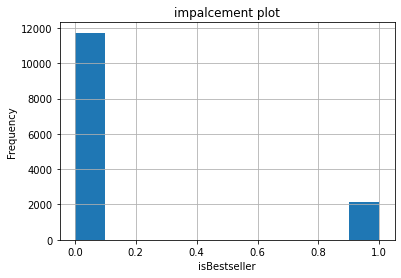

In [ ]:
df.isBestSaller.hist()
plt.xlabel("isBestseller")
plt.ylabel("Frequency")
plt.title("impalcement plot")

### Cheaking for the Null

Text(0, 0.5, 'the white lines --> null')

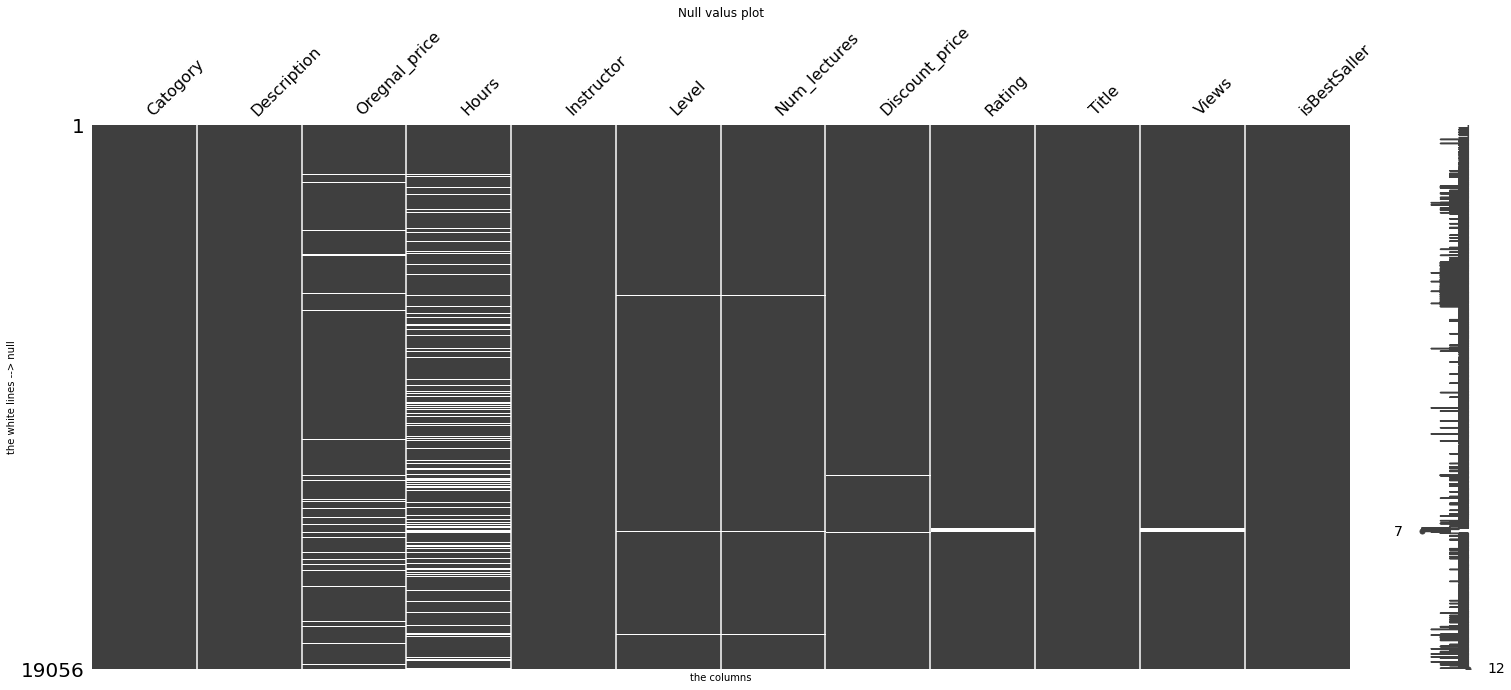

In [ ]:
msno.matrix(df)
plt.title("Null valus plot")
plt.xlabel("the columns")
plt.ylabel("the white lines --> null")

### Cheaking for the Outlier

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



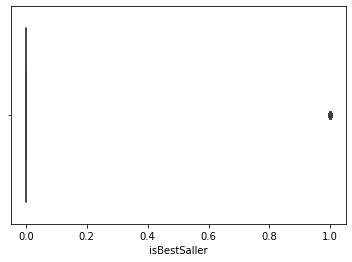

In [ ]:
sns.boxplot(df['isBestSaller'])

In [ ]:
fig = px.box(df, x='isBestSaller' , y='Views')
fig.show()

### plotting

In [ ]:
# word cloud on title
TitleBest = ""
Bestdf = df[df['isBestSaller']==1]
for row in Bestdf["Title"]:
  TitleBest += row

TitleNotBest = ""
notBestdf = df[df['isBestSaller']==0]
for row in notBestdf["Title"]:
  TitleNotBest += row


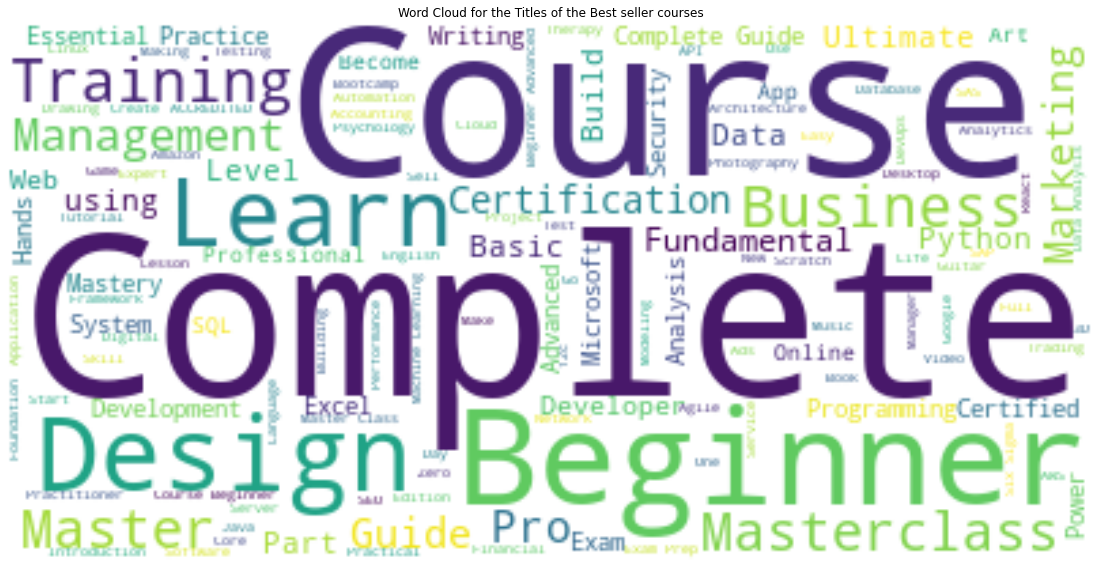

In [ ]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


wordcloud = WordCloud(max_font_size=100, max_words=10000, background_color="white").generate(TitleBest)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud for the Titles of the Best seller courses")
plt.show()

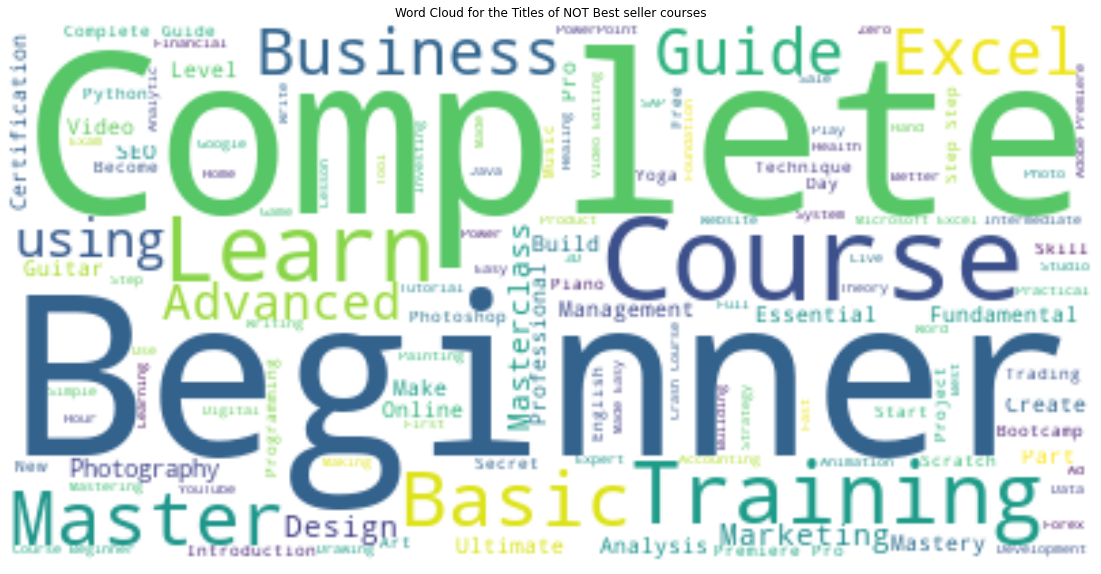

In [ ]:
wordcloud = WordCloud(max_font_size=100, max_words=10000, background_color="white").generate(TitleNotBest)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud for the Titles of NOT Best seller courses")
plt.show()

In [ ]:
# word cloud on des
DescriptionBest = ""
Bestdf = df[df['isBestSaller']==1]
for row in Bestdf["Description"]:
  DescriptionBest += row

DescriptionNotBest = ""
notBestdf = df[df['isBestSaller']==0]
for row in notBestdf["Description"]:
  DescriptionNotBest += str(row)

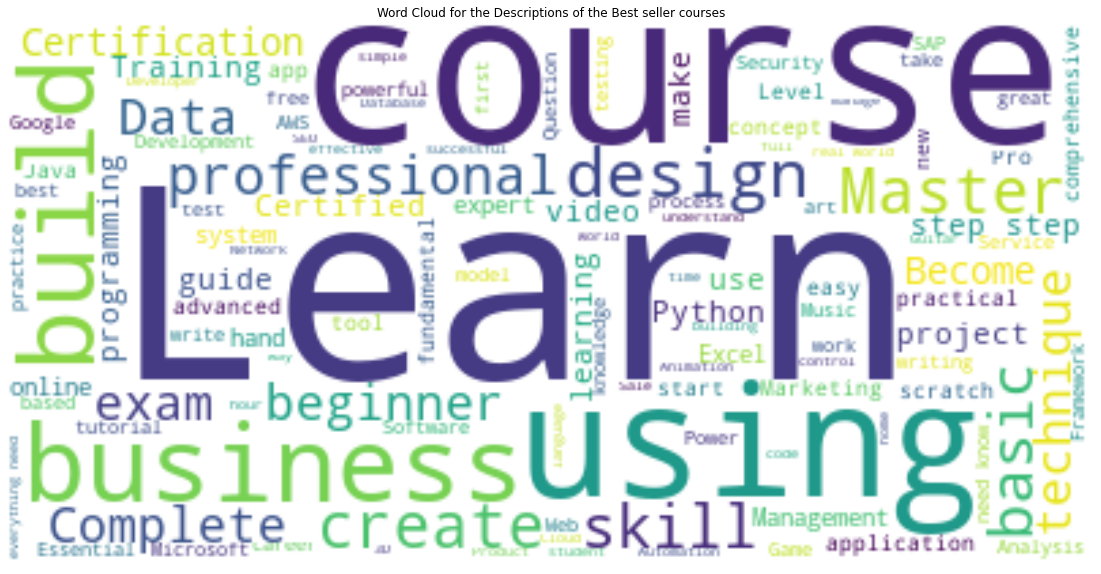

In [ ]:
wordcloud = WordCloud(max_font_size=100, max_words=10000, background_color="white").generate(DescriptionBest)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud for the Descriptions of the Best seller courses")
plt.show()

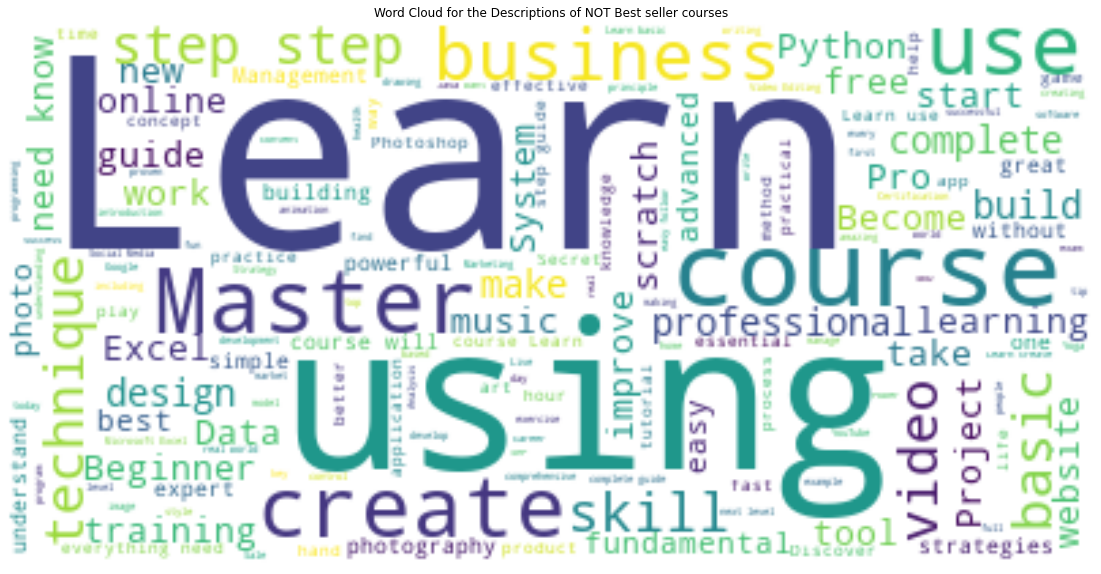

In [ ]:
wordcloud = WordCloud(max_font_size=100, max_words=10000, background_color="white").generate(DescriptionNotBest)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud for the Descriptions of NOT Best seller courses")
plt.show()

# Data Cleaning before

In [ ]:
# drop null
df = df.dropna().reset_index()

In [ ]:
df = df[df['Level']!= 'Current price$12.99Original Price$89.99']

In [ ]:
# mapping
cat_dic = {'development' : 0.0,
           'business': 1.0,
           'finance-and-accounting':2.0,
           'it-and-software':3.0,
           'office-productivity':4.0,
           'design':5.0,
           'marketing':6.0,
           'lifestyle':7.0,
           'photography-and-video':8.0,
           'health-and-fitness':9.0,
           'music':10.0, 
           'teaching-and-academics':11.0}

Level_dic = {'All Levels': 0.0, 
             'Beginner':1.0,
             'Intermediate':2.0,
             'Expert': 3.0}


df["Catogory"] = df.Catogory.map(cat_dic)
df["Level"] = df.Level.map(Level_dic)

### Feature eng. for cleaning

In [ ]:
df['langue'] = df['Title'].apply(detect)

# to make sure that the sentiment analysis made on english only
df = df[df['langue'] == "en"]

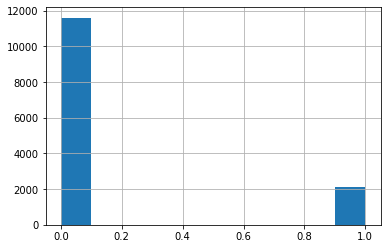

In [ ]:
# Cheak the impalcement after felter the English Title only
df.isBestSaller.hist()

In [ ]:
#df.to_excel("just_en_udemy_data.xlsx")

# MVP
- Basemodel 
- plot for y and y_predict for train and val sets with Basemodel|

In [ ]:
X= df[['Num_lectures','Rating','Views']].values
Y= df['isBestSaller'].values

X_train_beas, X_test_beas, Y_train_beas, Y_test_beas= train_test_split(X,Y, test_size=0.2)
X_train_beas, X_val_beas, Y_train_beas, Y_val_beas= train_test_split(X_train,Y_train, test_size=0.25)

In [ ]:
nb = BernoulliNB()
nb.fit(X_train,Y_train)
nb.score(X_val,Y_val)

0.852760736196319

-------------------------------------
- Precision: 0.000
- Recall: 0.000
- f1: 0.000
- Accuracy: 0.831
 
 
 


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



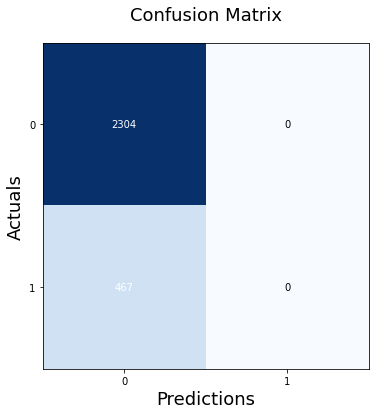

-------------------------------------


In [ ]:
matrixesCalculation(Y_test, nb.predict(X_test))

# Data Splitting

In [ ]:
X= df[['Catogory','Description','Level','Num_lectures','Rating','Title','Views']]
Y= df['isBestSaller']

X_train, X_test, Y_train, Y_test= train_test_split(X,Y, test_size=0.2)
X_train, X_val, Y_train, Y_val= train_test_split(X_train,Y_train, test_size=0.25)

# Data Cleaning after

### Changing all the Title and Description into lowercase 

In [ ]:
X_train['Title'] = X_train.Title.apply(lambda x: x.lower())
X_train['Description'] = X_train['Description'].apply(lambda x: x.lower())

### Apostrophe Lookup

In [ ]:
# Apostrophe Dictionary
apostrophe_dict = {
"ain't": "am not / are not",
"aren't": "are not / am not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had / he would",
"he'd've": "he would have",
"he'll": "he shall / he will",
"he'll've": "he shall have / he will have",
"he's": "he has / he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how has / how is",
"i'd": "I had / I would",
"i'd've": "I would have",
"i'll": "I shall / I will",
"i'll've": "I shall have / I will have",
"i'm": "I am",
"i've": "I have",
"isn't": "is not",
"it'd": "it had / it would",
"it'd've": "it would have",
"it'll": "it shall / it will",
"it'll've": "it shall have / it will have",
"it's": "it has / it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had / she would",
"she'd've": "she would have",
"she'll": "she shall / she will",
"she'll've": "she shall have / she will have",
"she's": "she has / she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as / so is",
"that'd": "that would / that had",
"that'd've": "that would have",
"that's": "that has / that is",
"there'd": "there had / there would",
"there'd've": "there would have",
"there's": "there has / there is",
"they'd": "they had / they would",
"they'd've": "they would have",
"they'll": "they shall / they will",
"they'll've": "they shall have / they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had / we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what shall / what will",
"what'll've": "what shall have / what will have",
"what're": "what are",
"what's": "what has / what is",
"what've": "what have",
"when's": "when has / when is",
"when've": "when have",
"where'd": "where did",
"where's": "where has / where is",
"where've": "where have",
"who'll": "who shall / who will",
"who'll've": "who shall have / who will have",
"who's": "who has / who is",
"who've": "who have",
"why's": "why has / why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had / you would",
"you'd've": "you would have",
"you'll": "you shall / you will",
"you'll've": "you shall have / you will have",
"you're": "you are",
"you've": "you have"
}
apostrophe_dict

{"'cause": 'because',
 "ain't": 'am not / are not',
 "aren't": 'are not / am not',
 "can't": 'cannot',
 "can't've": 'cannot have',
 "could've": 'could have',
 "couldn't": 'could not',
 "couldn't've": 'could not have',
 "didn't": 'did not',
 "doesn't": 'does not',
 "don't": 'do not',
 "hadn't": 'had not',
 "hadn't've": 'had not have',
 "hasn't": 'has not',
 "haven't": 'have not',
 "he'd": 'he had / he would',
 "he'd've": 'he would have',
 "he'll": 'he shall / he will',
 "he'll've": 'he shall have / he will have',
 "he's": 'he has / he is',
 "how'd": 'how did',
 "how'd'y": 'how do you',
 "how'll": 'how will',
 "how's": 'how has / how is',
 "i'd": 'I had / I would',
 "i'd've": 'I would have',
 "i'll": 'I shall / I will',
 "i'll've": 'I shall have / I will have',
 "i'm": 'I am',
 "i've": 'I have',
 "isn't": 'is not',
 "it'd": 'it had / it would',
 "it'd've": 'it would have',
 "it'll": 'it shall / it will',
 "it'll've": 'it shall have / it will have',
 "it's": 'it has / it is',
 "let's": 'l

In [ ]:
X_train['Title'] = X_train['Title'].apply(lambda x: lookup_dict(x,apostrophe_dict))
X_train['Description'] = X_train['Description'].apply(lambda x: lookup_dict(x,apostrophe_dict))

###  Replacing Punctuations with space

In [ ]:
X_train['Title'] = X_train['Title'].apply(lambda x: re.sub(r'[^\w\s]',' ',x))
X_train['Description'] = X_train['Description'].apply(lambda x: re.sub(r'[^\w\s]',' ',x))

### Replacing Special Characters with space

In [ ]:
X_train['Title'] = X_train['Title'].apply(lambda x: re.sub(r'[^a-zA-Z0-9]',' ',x))
X_train['Description'] = X_train['Description'].apply(lambda x: re.sub(r'[^a-zA-Z0-9]',' ',x))

### Replacing Numbers (integers) with space

In [ ]:
X_train['Title'] = X_train['Title'].apply(lambda x:re.sub(r'[^a-zA-Z]',' ',x))
X_train['Description'] = X_train['Description'].apply(lambda x: re.sub(r'[^a-zA-Z]',' ',x))

### Removing words whom length is 1

In [ ]:
X_train['Title'] = X_train['Title'].apply(lambda x:' '.join([w for w in x.split() if len(w)>1]))
X_train['Description'] = X_train['Description'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>1]))

### Removing Stopping words

In [ ]:
# Importing stop words from NLTK coupus and word tokenizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:

X_train['Title_token'] = X_train['Title'].apply(lambda x:word_tokenize(x))
X_train['Description_token'] = X_train['Description'].apply(lambda x: word_tokenize(x))

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
stop_words = set(stopwords.words('english'))

X_train['Title_token_filtered'] = X_train['Title_token'].apply(lambda x:[word for word in x if not word in stop_words])
X_train['Description_token_filtered'] = X_train['Description_token'].apply(lambda x: [word for word in x if not word in stop_words])

# Feature ENG.

### sampled data

#### imlearn

In [ ]:
import imblearn.over_sampling

up = imblearn.over_sampling.RandomOverSampler()
X_train_up, Y_train_up = up.fit_resample(X_train[['Catogory','Level','Num_lectures','Rating','Views']] ,Y_train )

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



#### Tomeklink

In [ ]:
from imblearn.under_sampling import TomekLinks

tl = TomekLinks(sampling_strategy = 'majority')
X_train_Tom, Y_train_Tom = tl.fit_resample(X_train[['Catogory','Level','Num_lectures','Rating','Views']], Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



#### SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 42, n_jobs=-1)
X_train_Smot,Y_train_Smot = smote.fit_resample(X_train[['Catogory','Level','Num_lectures','Rating','Views']], Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



#### KNN sampling

In [ ]:
from imblearn.under_sampling import EditedNearestNeighbours 

enn = EditedNearestNeighbours(sampling_strategy='majority', n_neighbors=30, kind_sel='all', n_jobs=-1)
X_train_enn, Y_train_enn = enn.fit_resample(X_train[['Catogory','Level','Num_lectures','Rating','Views']], Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



### TF-IDF Features

In [ ]:
vec =  TfidfVectorizer()
X_train["Description_Title"] = X_train["Title"] + X_train["Description"]
X_train_tf_idf_Description = vec.fit_transform(X_train["Description_Title"])

X_val["Description_Title"] = X_val["Title"] + X_val["Description"]
X_val_tf_idf_Description = vec.transform(X_val["Description_Title"])

X_test["Description_Title"] = X_test["Title"] + X_test["Description"]
X_test_tf_idf_Description = vec.transform(X_test["Description_Title"])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
X_train_tf_idf = pd.DataFrame(X_train_tf_idf_Description.toarray(), columns=vec.get_feature_names())
listof = ["Catogory","Level","Num_lectures","Rating","Views"]
X_train_tf_idf[listof] = X_train[listof]

X_val_tf_idf = pd.DataFrame(X_val_tf_idf_Description.toarray(), columns=vec.get_feature_names())
X_val_tf_idf[listof] = X_val[listof]                     

X_test_tf_idf = pd.DataFrame(X_test_tf_idf_Description.toarray(), columns=vec.get_feature_names())
X_test_tf_idf[listof] = X_test[listof]

### Worde2Vec features

In [ ]:
from gensim.models import Word2Vec
X_train["Title_Description_token_filtered"] = X_train["Title_token_filtered"] +  X_train["Description_token_filtered"]
all_words=pd.Series(X_train["Title_Description_token_filtered"]).values
num_features = 250 #400 #100 #250 #300 #we tried different values and the result dosn't change so we will put 250 to speed up training time
min_count = 40 #10 #20 #30 #40 #50 #60  , 40 gave the better result
model1= Word2Vec(all_words,size = num_features, min_count=min_count)

In [ ]:
DataVecs_Train = getAvgFeatureVecs(X_train["Title_Description_token_filtered"], model1, num_features)

Review 0 of 8313
Review 1000 of 8313


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: DeprecationWarning:

Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: RuntimeWarning:

invalid value encountered in true_divide



Review 2000 of 8313
Review 3000 of 8313
Review 4000 of 8313
Review 5000 of 8313
Review 6000 of 8313
Review 7000 of 8313
Review 8000 of 8313


In [ ]:
x_train_w2v, x_val_w2v, y_train_w2v, y_val_w2v = train_test_split(DataVecs_Train, Y_train, random_state=42, test_size=0.3)

# Modeling

## Logistic Regression

### Sampled data

fit done
-------------------------------------
- Precision: 0.221
- Recall: 0.737
- f1: 0.340
- Accuracy: 0.577
 
 
 


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



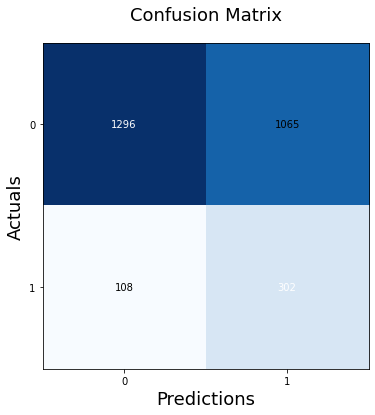

-------------------------------------


In [ ]:
lr_up = experiment(LogisticRegression(), X_train_up, Y_train_up, X_val.drop(['Description', 'Title','Description_Title'],axis= 1) ,Y_val) 

fit done
-------------------------------------
- Precision: 0.603
- Recall: 0.085
- f1: 0.150
- Accuracy: 0.856
 
 
 


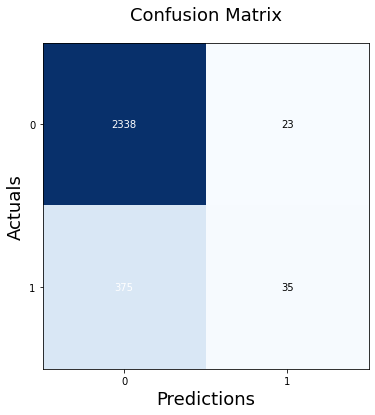

-------------------------------------


In [ ]:
lr_Tom = experiment(LogisticRegression(), X_train_Tom, Y_train_Tom, X_val.drop(['Description', 'Title','Description_Title'],axis= 1) ,Y_val) 

fit done
-------------------------------------
- Precision: 0.248
- Recall: 0.661
- f1: 0.361
- Accuracy: 0.654
 
 
 


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



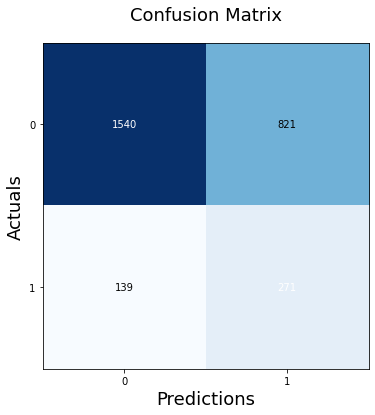

-------------------------------------


In [ ]:
lr_Smot = experiment(LogisticRegression(), X_train_Smot, Y_train_Smot, X_val.drop(['Description', 'Title','Description_Title'],axis= 1) ,Y_val) 

fit done
-------------------------------------
- Precision: 0.228
- Recall: 0.922
- f1: 0.366
- Accuracy: 0.528
 
 
 


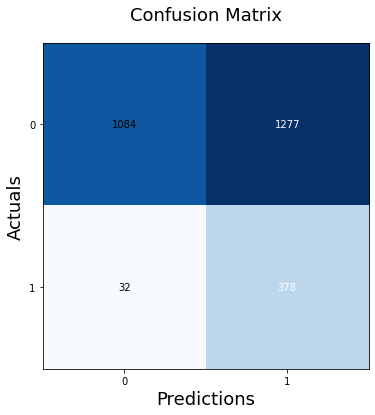

-------------------------------------


In [ ]:
lr_enn = experiment(LogisticRegression(), X_train_enn, Y_train_enn, X_val.drop(['Description', 'Title','Description_Title'],axis= 1) ,Y_val) 

### Tf_idf Features

fit done
-------------------------------------
- Precision: 0.000
- Recall: 0.000
- f1: 0.000
- Accuracy: 0.852
 
 
 


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



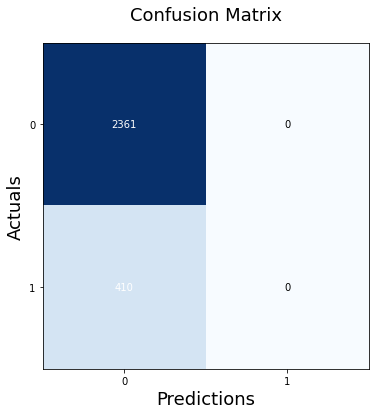

-------------------------------------


In [ ]:
lr_TF_IDF = experiment(LogisticRegression(), X_train_tf_idf.fillna(0), Y_train, X_val_tf_idf.fillna(0) ,Y_val) 

### Wored2Vec

fit done
-------------------------------------
- Precision: 0.250
- Recall: 0.001
- f1: 0.002
- Accuracy: 0.847
 
 
 


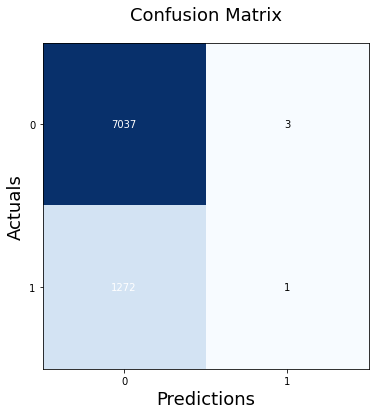

-------------------------------------


In [ ]:
DataVecs_Train = pd.DataFrame(DataVecs_Train).replace([np.inf, -np.inf], np.nan)
DataVecs_Train = DataVecs_Train.fillna(0)
lr_Word2Vec = experiment(LogisticRegression(), DataVecs_Train, Y_train, DataVecs_Train ,Y_train) 

## KNN

In [ ]:
parameters = {
    "n_neighbors": range(1, 50),
    "weights": ["uniform", "distance"],
}

### Sampled data

-------------------------------------
- Precision: 0.286
- Recall: 0.298
- f1: 0.292
- Accuracy: 0.786
 
 
 


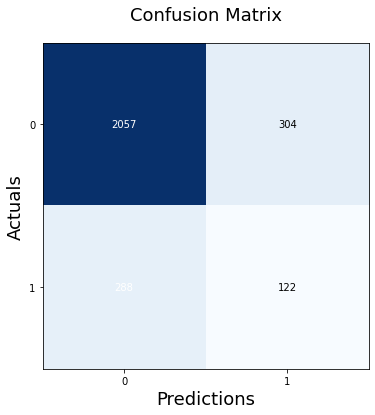

-------------------------------------


In [ ]:
best_params_KNN_up , best_estimator_KNN_up = gred_model(KNeighborsClassifier(), parameters , X_train_up, Y_train_up, X_val.drop(['Description', 'Title','Description_Title'],axis= 1) ,Y_val)

-------------------------------------
- Precision: 0.470
- Recall: 0.193
- f1: 0.273
- Accuracy: 0.848
 
 
 


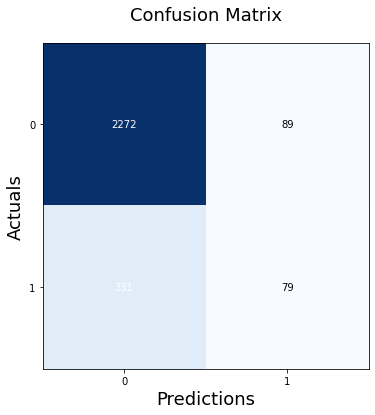

-------------------------------------


In [ ]:
best_params_KNN_Tom , best_estimator_KNN_Tom = gred_model(KNeighborsClassifier(), parameters ,X_train_Tom, Y_train_Tom, X_val.drop(['Description', 'Title','Description_Title'],axis= 1) ,Y_val)

-------------------------------------
- Precision: 0.252
- Recall: 0.449
- f1: 0.323
- Accuracy: 0.721
 
 
 


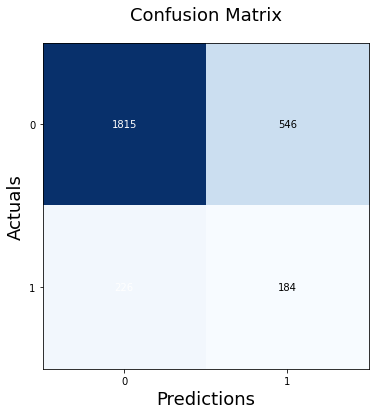

-------------------------------------


In [ ]:
best_params_KNN_Smot , best_estimator_KNN_Smot = gred_model(KNeighborsClassifier(), parameters ,X_train_Smot, Y_train_Smot, X_val.drop(['Description', 'Title','Description_Title'],axis= 1) ,Y_val)

-------------------------------------
- Precision: 0.195
- Recall: 0.927
- f1: 0.323
- Accuracy: 0.424
 
 
 


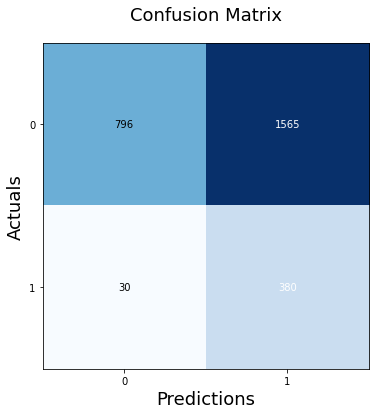

-------------------------------------


In [ ]:
best_params_KNN_enn , best_estimator_KNN_enn = gred_model(KNeighborsClassifier(), parameters ,X_train_enn, Y_train_enn, X_val.drop(['Description', 'Title','Description_Title'],axis= 1) ,Y_val)


### Tf_idf Features

In [ ]:
best_params_KNN_TF_IDF , best_estimator_KNN_TF_IDF = gred_model(KNeighborsClassifier(), parameters , X_train_tf_idf.fillna(0), Y_train, X_val_tf_idf.fillna(0) ,Y_val)


ValueError: ignored

## Naive Bayes

### Sampled data

fit done
-------------------------------------
- Precision: 0.345
- Recall: 0.349
- f1: 0.347
- Accuracy: 0.806
 
 
 


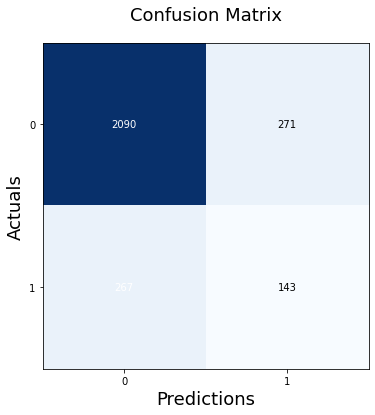

-------------------------------------


In [ ]:
nb_up = experiment(MultinomialNB(), X_train_up, Y_train_up, X_val.drop(['Description', 'Title','Description_Title'],axis= 1) ,Y_val) 

fit done
-------------------------------------
- Precision: 0.334
- Recall: 0.366
- f1: 0.349
- Accuracy: 0.798
 
 
 


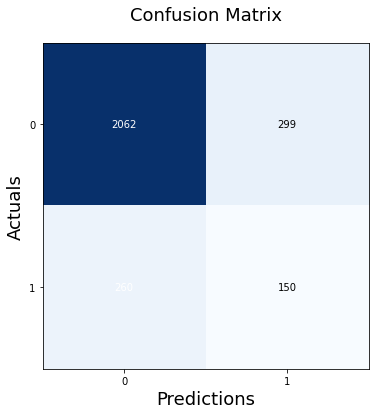

-------------------------------------


In [ ]:
nb_Tom = experiment(MultinomialNB(), X_train_Tom, Y_train_Tom, X_val.drop(['Description', 'Title','Description_Title'],axis= 1) ,Y_val) 

fit done
-------------------------------------
- Precision: 0.347
- Recall: 0.354
- f1: 0.350
- Accuracy: 0.806
 
 
 


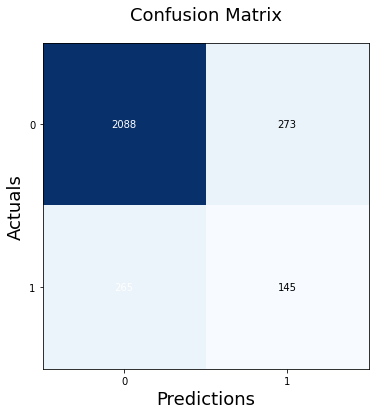

-------------------------------------


In [ ]:
nb_Smot = experiment(MultinomialNB(), X_train_Smot, Y_train_Smot, X_val.drop(['Description', 'Title','Description_Title'],axis= 1) ,Y_val) 

fit done
-------------------------------------
- Precision: 0.239
- Recall: 0.737
- f1: 0.361
- Accuracy: 0.613
 
 
 


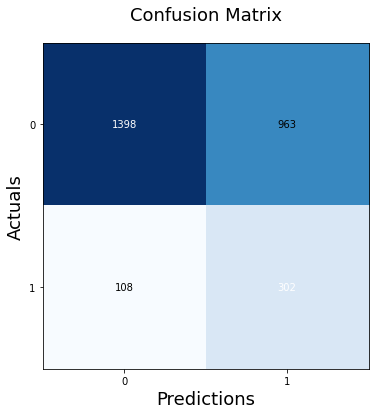

-------------------------------------


In [ ]:
nb_enn = experiment(MultinomialNB(), X_train_enn, Y_train_enn, X_val.drop(['Description', 'Title','Description_Title'],axis= 1) ,Y_val) 

### Tf_idf Features

fit done
-------------------------------------
- Precision: 0.212
- Recall: 0.476
- f1: 0.293
- Accuracy: 0.661
 
 
 


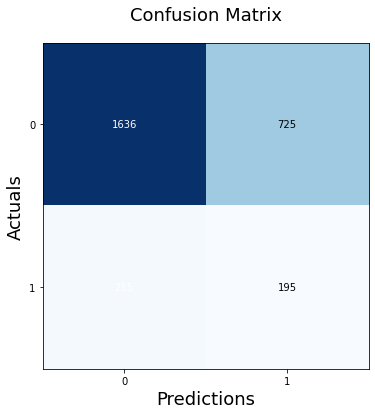

-------------------------------------


In [ ]:
nb_TF_IDF = experiment(MultinomialNB(), X_train_tf_idf.fillna(0), Y_train, X_val_tf_idf.fillna(0) ,Y_val) 

## Random forest

In [ ]:
parameters =  {
    'n_estimators': [100],#, 200, 300, 1000
    'criterion':['entropy'], #,'gini'
    'max_depth': [80],#, 90, 100, 110
    'min_samples_split': [8], #, 10, 12
    'min_samples_leaf': [3],#, 4, 5
    'max_features': [2],#, 3
    'bootstrap': [True]  
}

In [ ]:
#http://www.semspirit.com/artificial-intelligence/machine-learning/classification/classifier-evaluation/receiver-operating-characteristic-roc-curves/


### Sampled data

-------------------------------------
- Precision: 0.387
- Recall: 0.478
- f1: 0.428
- Accuracy: 0.811
 
 
 


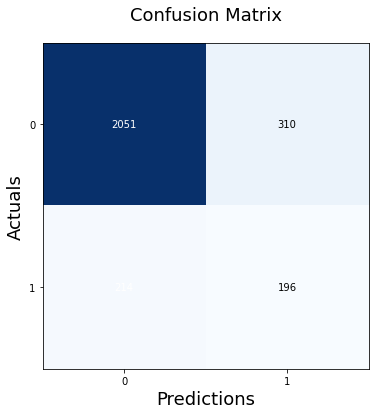

-------------------------------------


In [ ]:
best_params_rfc_up , best_estimator_rfc_up = gred_model(RandomForestClassifier(), parameters , X_train_up, Y_train_up, X_val.drop(['Description', 'Title','Description_Title'],axis= 1) ,Y_val)

-------------------------------------
- Precision: 0.485
- Recall: 0.241
- f1: 0.322
- Accuracy: 0.850
 
 
 


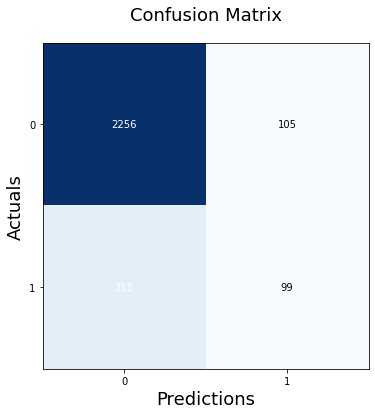

-------------------------------------


In [ ]:
best_params_rfc_Tom , best_estimator_rfc_Tom = gred_model(RandomForestClassifier(), parameters ,X_train_Tom, Y_train_Tom, X_val.drop(['Description', 'Title','Description_Title'],axis= 1) ,Y_val)

-------------------------------------
- Precision: 0.477
- Recall: 0.327
- f1: 0.388
- Accuracy: 0.847
 
 
 


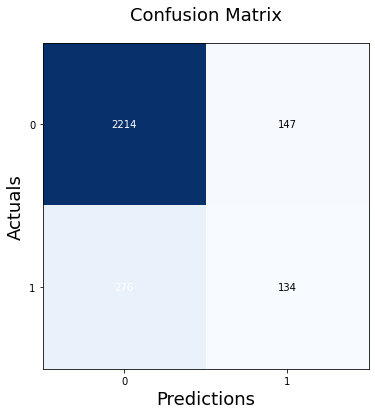

-------------------------------------


In [ ]:
best_params_rfc_Smot , best_estimator_rfc_Smot = gred_model(RandomForestClassifier(), parameters ,X_train_Smot, Y_train_Smot, X_val.drop(['Description', 'Title','Description_Title'],axis= 1) ,Y_val)

-------------------------------------
- Precision: 0.225
- Recall: 0.920
- f1: 0.361
- Accuracy: 0.519
 
 
 


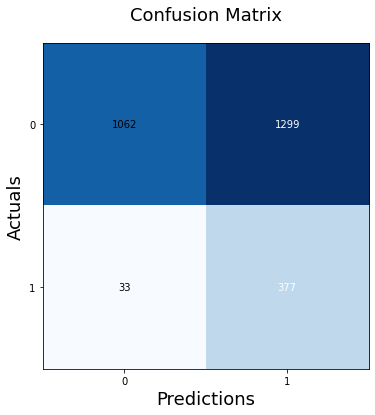

-------------------------------------


In [ ]:
best_params_rfc_enn , best_estimator_rfc_enn = gred_model(RandomForestClassifier(), parameters ,X_train_enn, Y_train_enn, X_val.drop(['Description', 'Title','Description_Title'],axis= 1) ,Y_val)

### Tf_idf Features

-------------------------------------
- Precision: 0.000
- Recall: 0.000
- f1: 0.000
- Accuracy: 0.852
 
 
 


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



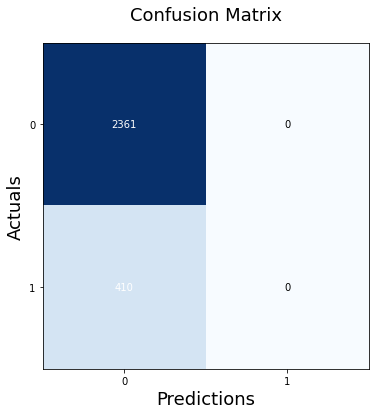

-------------------------------------


In [ ]:
best_params_rfc_TF_IDF , best_estimator_rfc_TF_IDF = gred_model(RandomForestClassifier(), parameters , X_train_tf_idf.fillna(0), Y_train, X_val_tf_idf.fillna(0) ,Y_val)


# Modeling Evaluation 

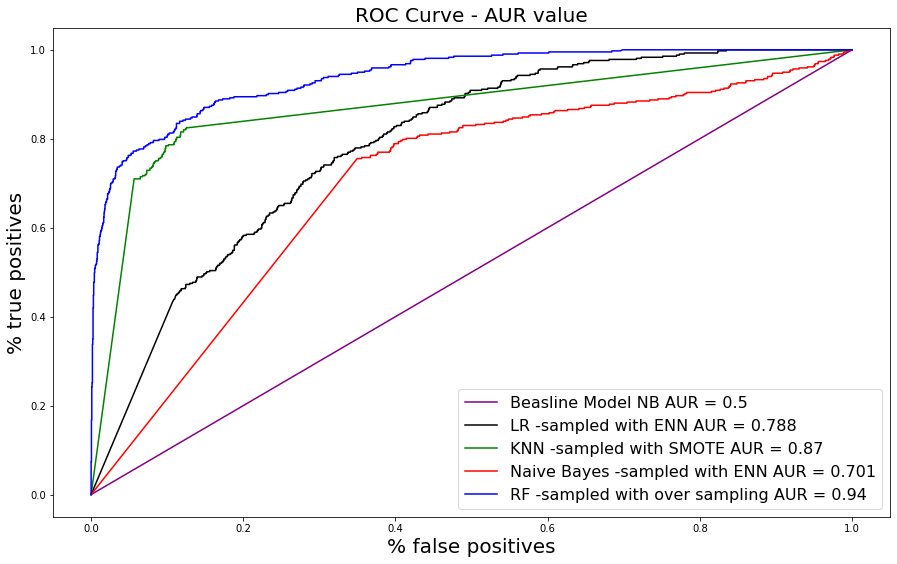

In [ ]:
# ROC carve


#persuasion 
#recall
#f1
#conviesion matrix
#Accuracy 

def roccurve(model,y_values, y_preds_proba):
  fpr, tpr, _ = metrics.roc_curve(y_values, y_preds_proba)
  aur = metrics.auc(fpr,tpr)
  return fpr, tpr, aur

plt.figure(figsize=(15,9))


# Beasline
fpr_nb, tpr_nb, aur_nb = roccurve(nb,Y_test, nb.predict_proba(X_test[['Num_lectures', 'Rating', 'Views']]).T[1])
plt.plot(fpr_nb,tpr_nb, color='purple', label=f'Beasline Model NB AUR = {str(round(aur_nb,3))}')

# Log Reg
fpr_lr_enn, tpr_lr_enn, aur_lr_enn = roccurve(lr_enn,Y_test, lr_enn.predict_proba(X_test[listof]).T[1])
plt.plot(fpr_lr_enn,tpr_lr_enn, color='black', label=f'LR -sampled with ENN AUR = {str(round(aur_lr_enn,3))}')

#KNN
fpr_knn, tpr_knn, aur_knn = roccurve(best_estimator_KNN_Smot,Y_test, best_estimator_KNN_Smot.predict_proba(X_test[listof]).T[1])
plt.plot(fpr_knn,tpr_knn, color='green', label=f'KNN -sampled with SMOTE AUR = {str(round(aur_knn,3))}')

#NB
fpr_NB, tpr_NB, aur_NB = roccurve(nb_enn,Y_test, nb_enn.predict_proba(X_test[listof]).T[1])
plt.plot(fpr_NB,tpr_NB, color='red', label=f'Naive Bayes -sampled with ENN AUR = {str(round(aur_NB,3))}')

#RF
fpr_RF, tpr_RF, aur_RF = roccurve(best_estimator_rfc_up,Y_test, best_estimator_rfc_up.predict_proba(X_test[listof]).T[1])
plt.plot(fpr_RF,tpr_RF, color='blue', label=f'RF -sampled with over sampling AUR = {str(round(aur_RF,3))}')


plt.title("ROC Curve - AUR value",fontsize=20)
plt.xlabel('% false positives',fontsize=20)
plt.ylabel('% true positives',fontsize=20)


plt.legend(prop={"size":16})
plt.show()